Impoting the useful libraries

In [ ]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd

Importing the dataset

In [ ]:
mnist=tf.keras.datasets.mnist
(xtrain,ytrain),(xtest,ytest)=mnist.load_data()
#load_data function loads the mnist data and splits it into training and testing data

11490434/11490434 [==============================] - 0s 0us/step


Normalising the data

In [ ]:
xtrain=tf.keras.utils.normalize(xtrain,axis=1)
xtest=tf.keras.utils.normalize(xtest,axis=1)
#we do not normalize the y data because its just labels

In [ ]:
print("xtrain shape:", xtrain.shape) #60000 images, 28x28 grayscale image
print("ytrain shape:", ytrain.shape) #60000 labels corresponding to training dataset
print("xtest shape:", xtest.shape) #10000 images, 28x28 grayscale image
print("ytest shape:", ytest.shape) #1000 labels corresponding to testing dataset

xtrain shape: (60000, 28, 28)
ytrain shape: (60000,)
xtest shape: (10000, 28, 28)
ytest shape: (10000,)


Defining the model

In [ ]:
#We are taking an input layer, 2 hidden layers and 1 output layer
model=tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28,28)))  #Input Layer
model.add(tf.keras.layers.Dense(units=128,activation='relu')) #Hidden Layer 1
model.add(tf.keras.layers.Dense(units=128,activation='relu')) #Hidden Layer 2
model.add(tf.keras.layers.Dense(units=10,activation='softmax')) #Output Layer

Compiling the model

In [ ]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

Model Training

In [ ]:
model.fit(xtrain,ytrain,epochs=35)
#Epochs- The total number of iterations for training the machine learning model with all the training data in one cycle

Epoch 1/35
1875/1875 [==============================] - 6s 2ms/step - loss: 0.2598 - accuracy: 0.9240
Epoch 2/35
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1056 - accuracy: 0.9670
Epoch 3/35
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0733 - accuracy: 0.9766
Epoch 4/35
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0536 - accuracy: 0.9829
Epoch 5/35
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0412 - accuracy: 0.9868
Epoch 6/35
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0304 - accuracy: 0.9901
Epoch 7/35
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0262 - accuracy: 0.9914
Epoch 8/35
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0208 - accuracy: 0.9928
Epoch 9/35
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0170 - accuracy: 0.9944
Epoch 10/35
1875/1875 [==============================] - 4s 2ms/step - loss: 0.014

Testing the model

In [ ]:
model.evaluate(xtest,ytest)

313/313 [==============================] - 0s 1ms/step - loss: 0.1941 - accuracy: 0.9766


[0.19410096108913422, 0.9765999913215637]

Making Predictions

Enter image path: /content/1.png
1/1 [==============================] - 0s 15ms/step
The result is probably 2


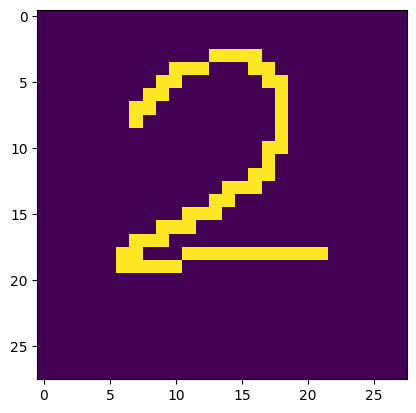

In [ ]:
imgpath=input("Enter image path: ")
img=cv.imread(imgpath)[:,:,0]
img=np.invert(np.array([img]))
prediction=model.predict(img)
print(f'The result is probably {np.argmax(prediction)}')
plt.imshow(img[0])
plt.show()

Saving the model

In [ ]:
model.save('/content/drive/MyDrive/digits.model')